In [146]:
# importing the libraries and the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
from scipy.stats import skew
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [148]:
# importing the dataset
df=pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [150]:
df.info()  #gives info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [152]:
df.shape # this gives the size of the dataset

(101, 18)

In [154]:
df.dtypes  # this gives the type of the features present in the dataset.

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [156]:
df.describe() # gives the sumary statistics of the features

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [158]:
df.isnull().sum() # checking for missing or null values

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [160]:
df[df.duplicated()] # to check duplicated rows

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [161]:
df.columns[df.columns.duplicated()] # to check duplicated coluns

Index([], dtype='object')

In [162]:
# dropping the animal column because it is just an identifier
df=df.loc[:, ~df.columns.isin(['animal name'])] # isin checks whether the columns are in the dataset and drops them if true
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


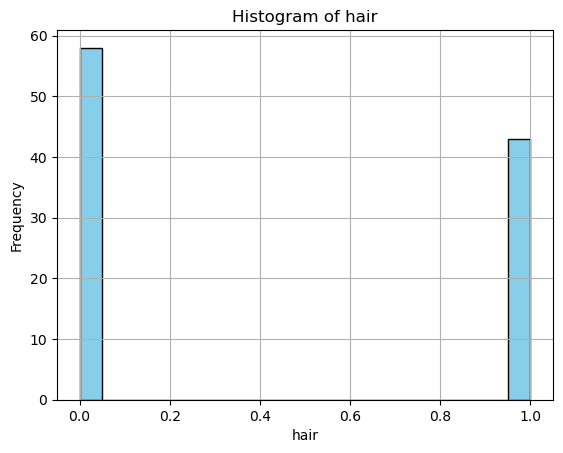

Skewness: 0.30
negatively skewed


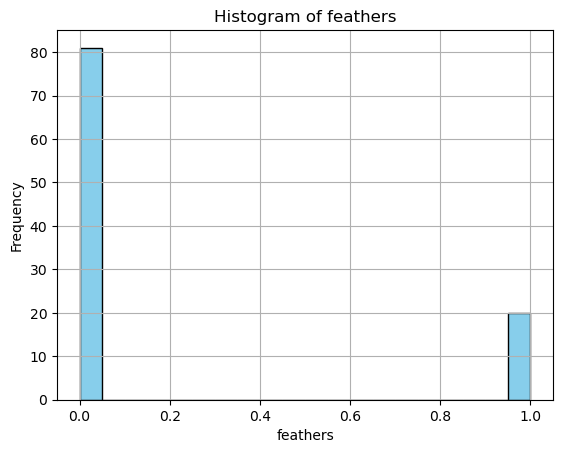

Skewness: 1.52
positively skewed


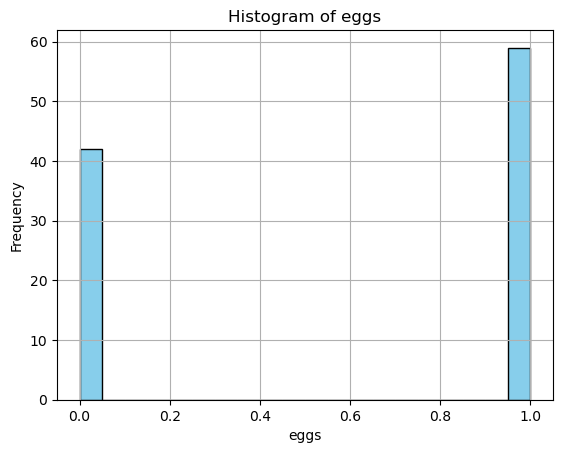

Skewness: -0.34
negatively skewed


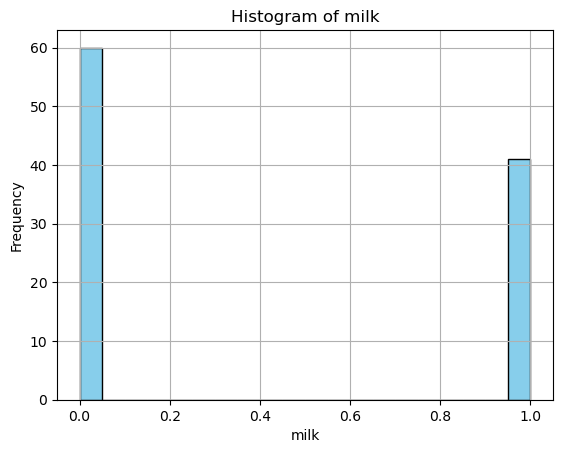

Skewness: 0.38
negatively skewed


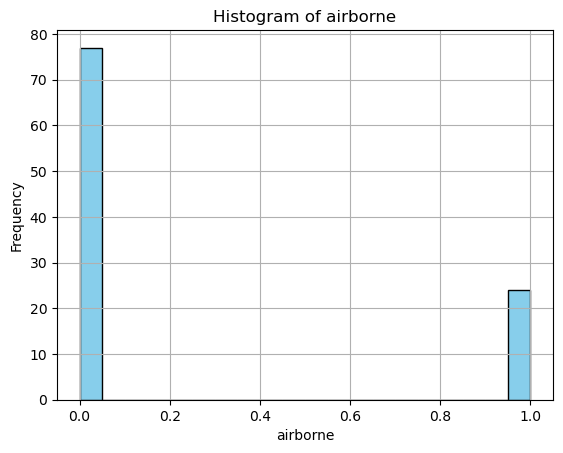

Skewness: 1.23
positively skewed


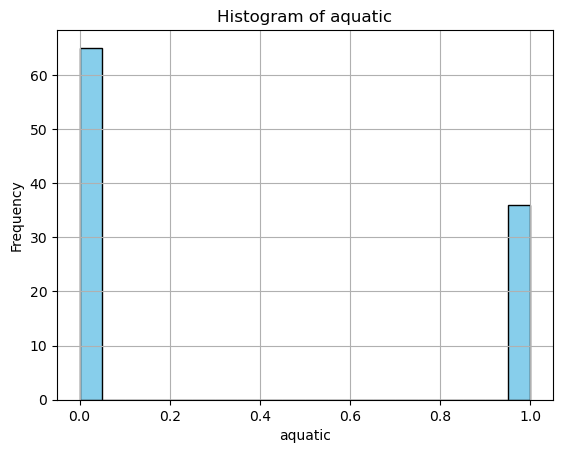

Skewness: 0.60
negatively skewed


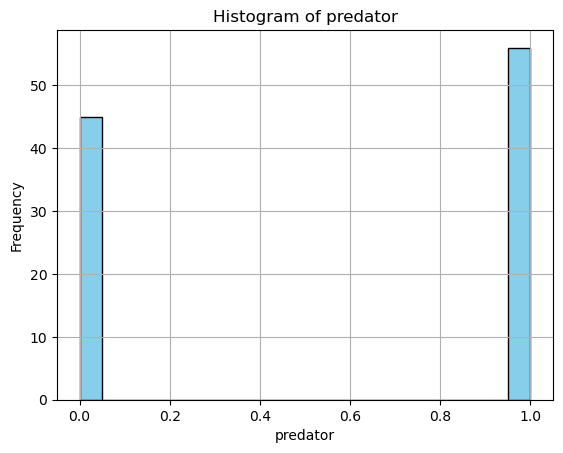

Skewness: -0.22
negatively skewed


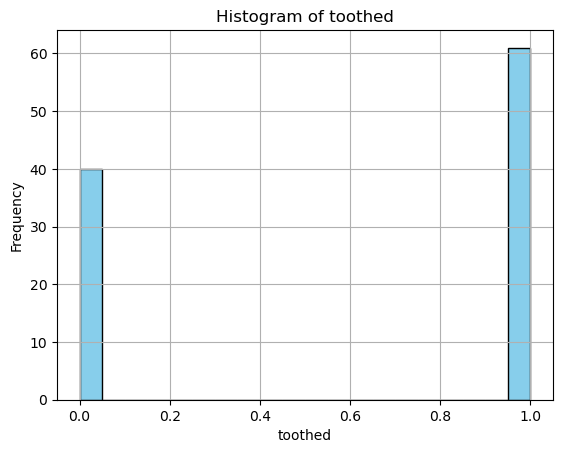

Skewness: -0.43
negatively skewed


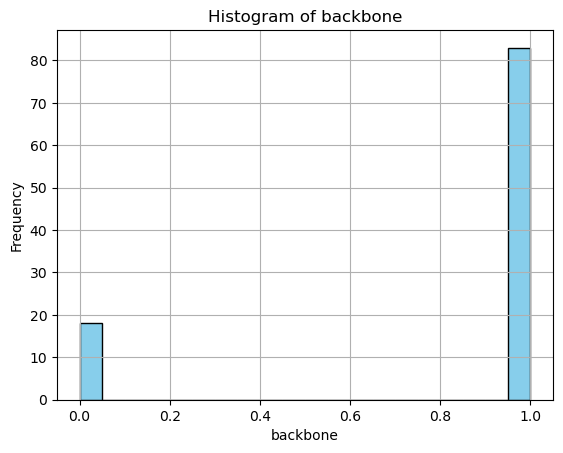

Skewness: -1.68
negatively skewed


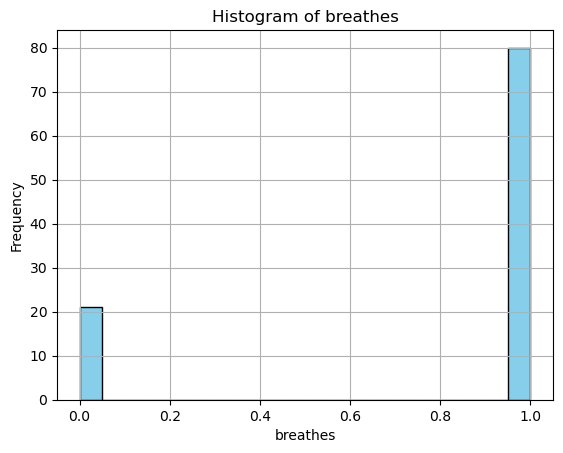

Skewness: -1.44
negatively skewed


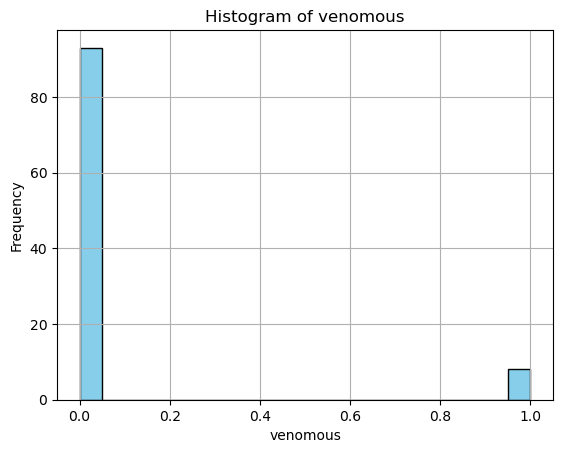

Skewness: 3.12
positively skewed


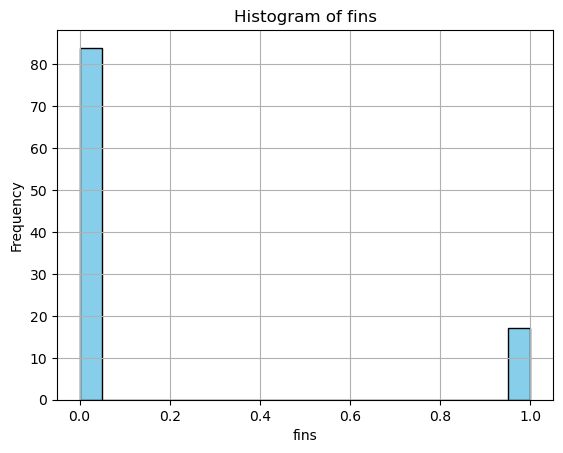

Skewness: 1.77
positively skewed


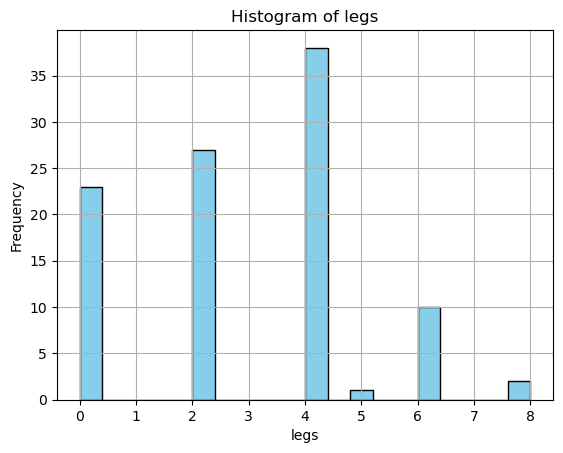

Skewness: 0.14
negatively skewed


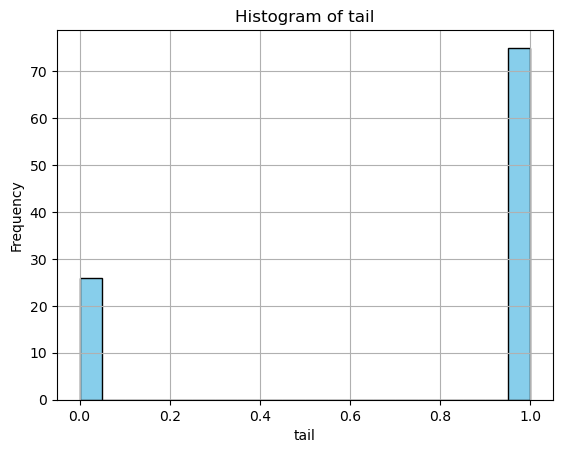

Skewness: -1.11
negatively skewed


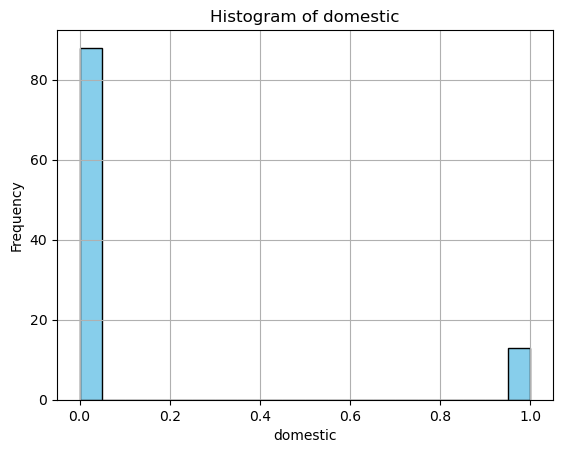

Skewness: 2.22
positively skewed


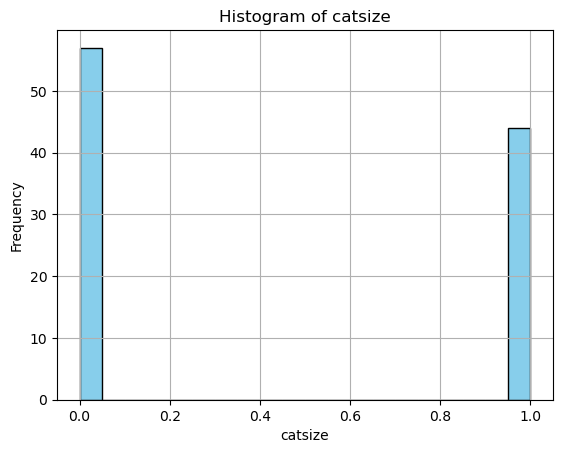

Skewness: 0.26
negatively skewed


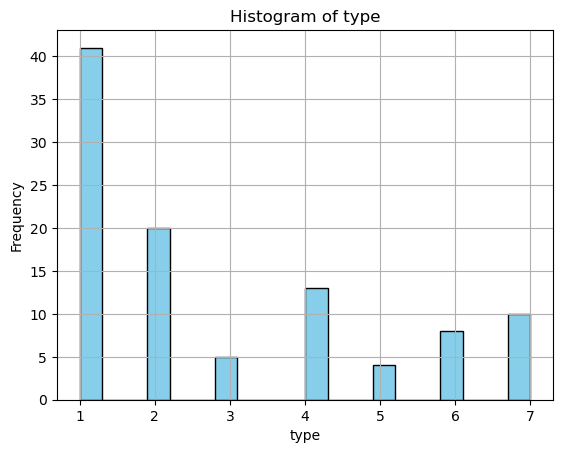

Skewness: 0.84
negatively skewed


In [164]:
# visualizations histograms
num_col=df.select_dtypes(include=["number"]).columns
for col in num_col:
    col_skewness = skew(df[col]) #calculating skewness of each histogram
    
    df[col].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
    print(f"Skewness: {col_skewness:.2f}") # printing skewness
    # deterining the skewness(=ve or -ve)
    if col_skewness > 1:
        print("positively skewed")
    else:
        print("negatively skewed")

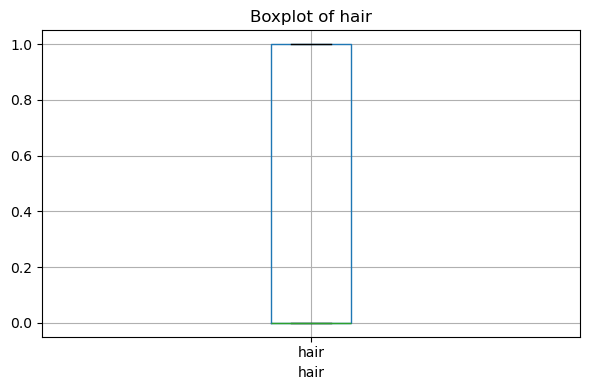

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


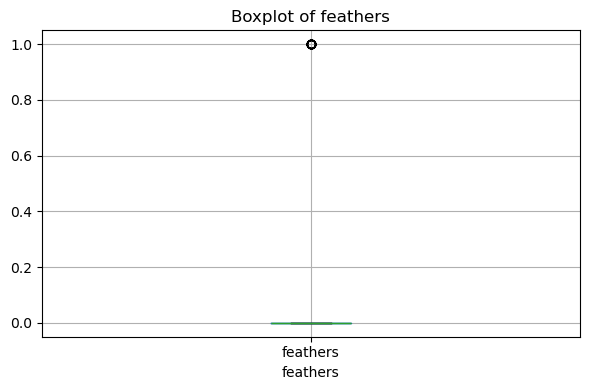

Outliers detected: 20
Lower extreme: 0.0
Upper extreme: 0.0


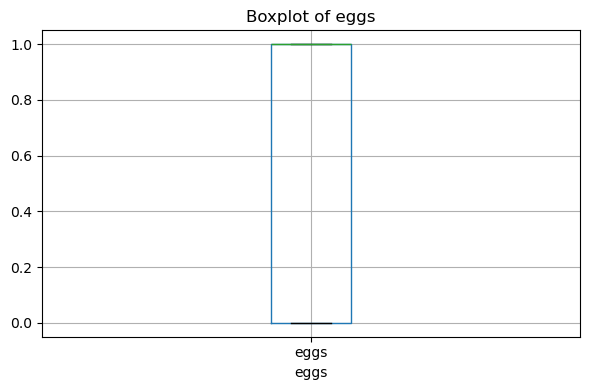

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


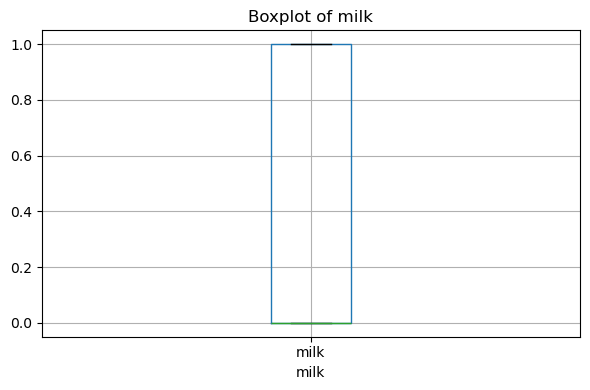

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


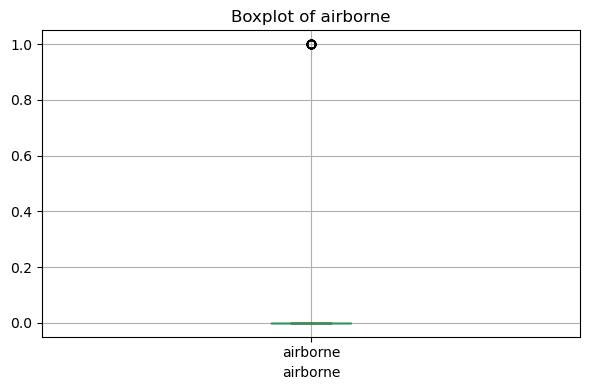

Outliers detected: 24
Lower extreme: 0.0
Upper extreme: 0.0


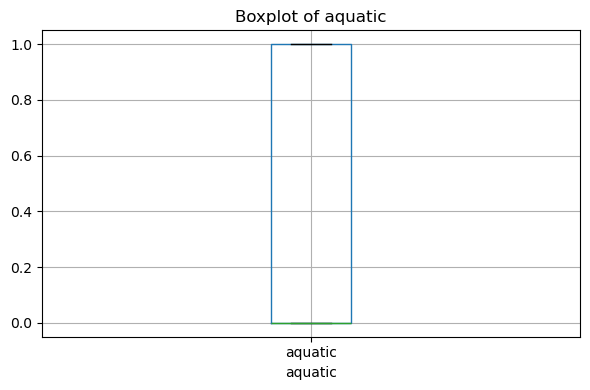

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


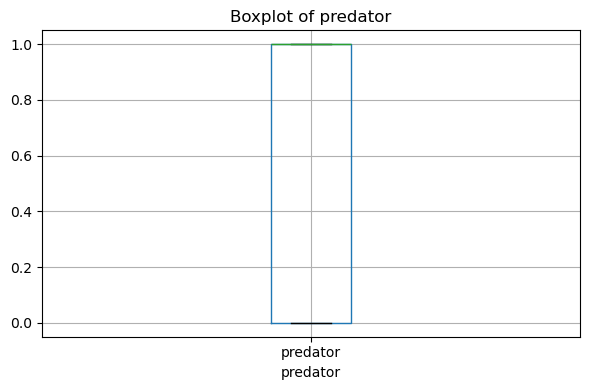

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


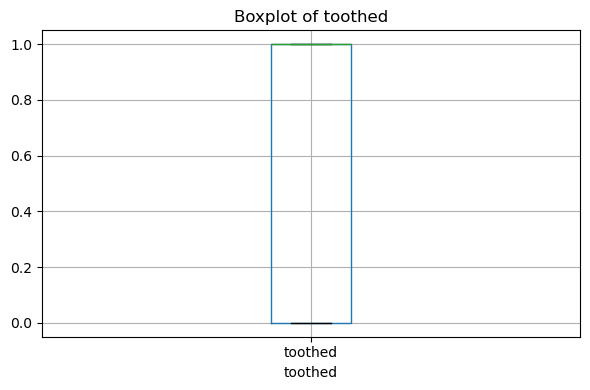

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


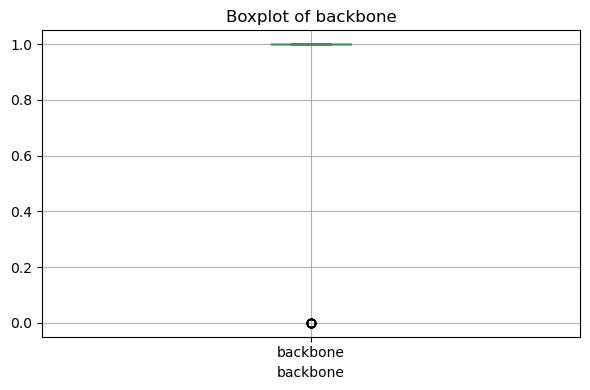

Outliers detected: 18
Lower extreme: 1.0
Upper extreme: 1.0


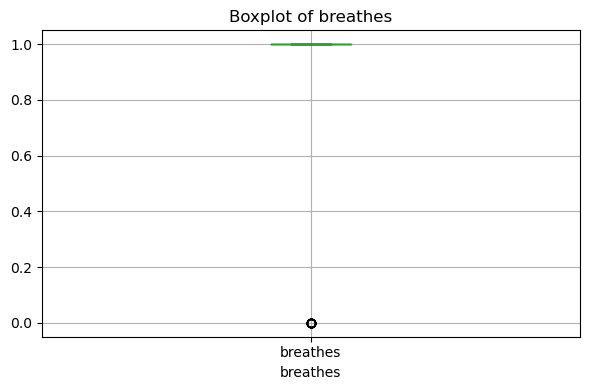

Outliers detected: 21
Lower extreme: 1.0
Upper extreme: 1.0


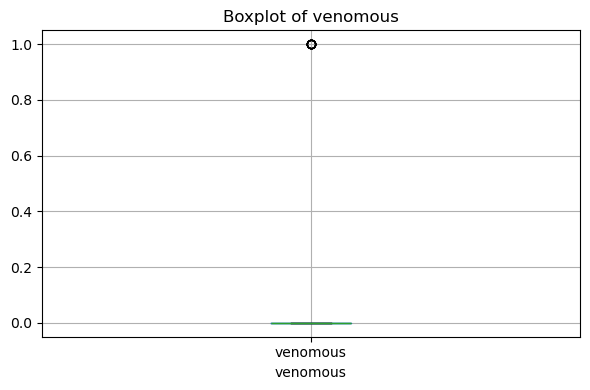

Outliers detected: 8
Lower extreme: 0.0
Upper extreme: 0.0


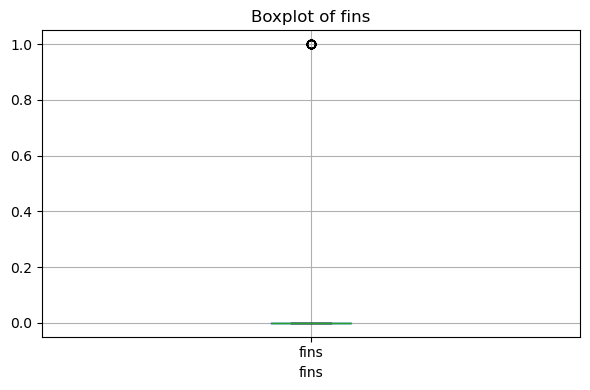

Outliers detected: 17
Lower extreme: 0.0
Upper extreme: 0.0


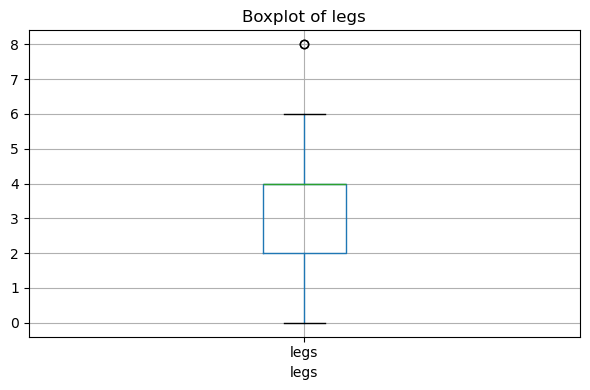

Outliers detected: 2
Lower extreme: -1.0
Upper extreme: 7.0


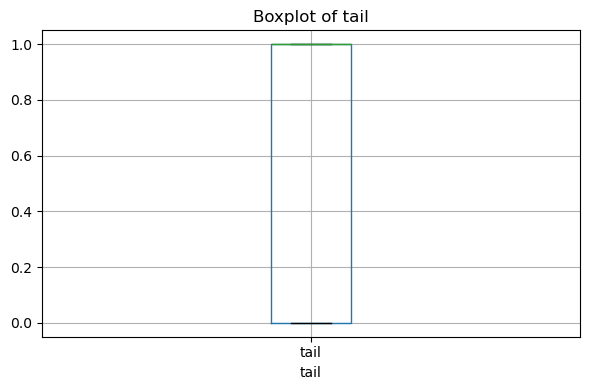

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


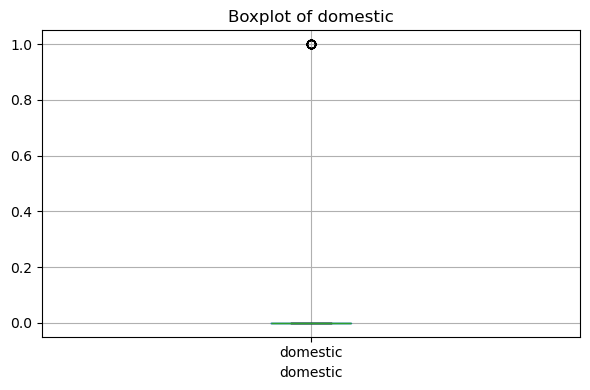

Outliers detected: 13
Lower extreme: 0.0
Upper extreme: 0.0


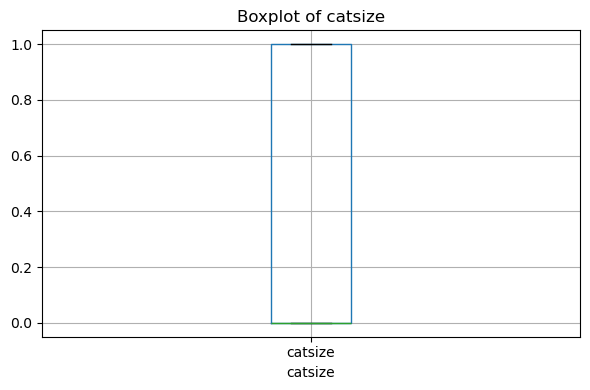

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


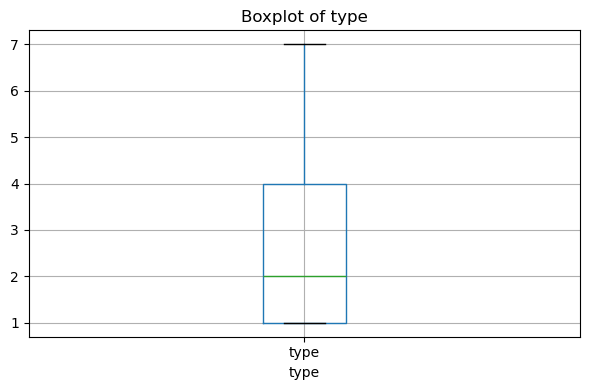

Outliers detected: 0
Lower extreme: -3.5
Upper extreme: 8.5


In [166]:
# boxplots
for col in num_col:
    series = df[col]
  # finding outliers by iqr
    Q1 = series.quantile(0.25) # determining q1
    Q3 = series.quantile(0.75)  # determining q3
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5 * IQR  #deterining lower extreme
    upper_extreme = Q3 + 1.5 * IQR   #deterining upper extreme
    outliers = series[(series < lower_extreme) | (series > upper_extreme)] # determining outliers

    plt.figure(figsize=(6, 4))
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    print(f"Outliers detected: {len(outliers)}") #printing no of outliers
    print(f"Lower extreme: {lower_extreme}")
    print(f"Upper extreme: {upper_extreme}")

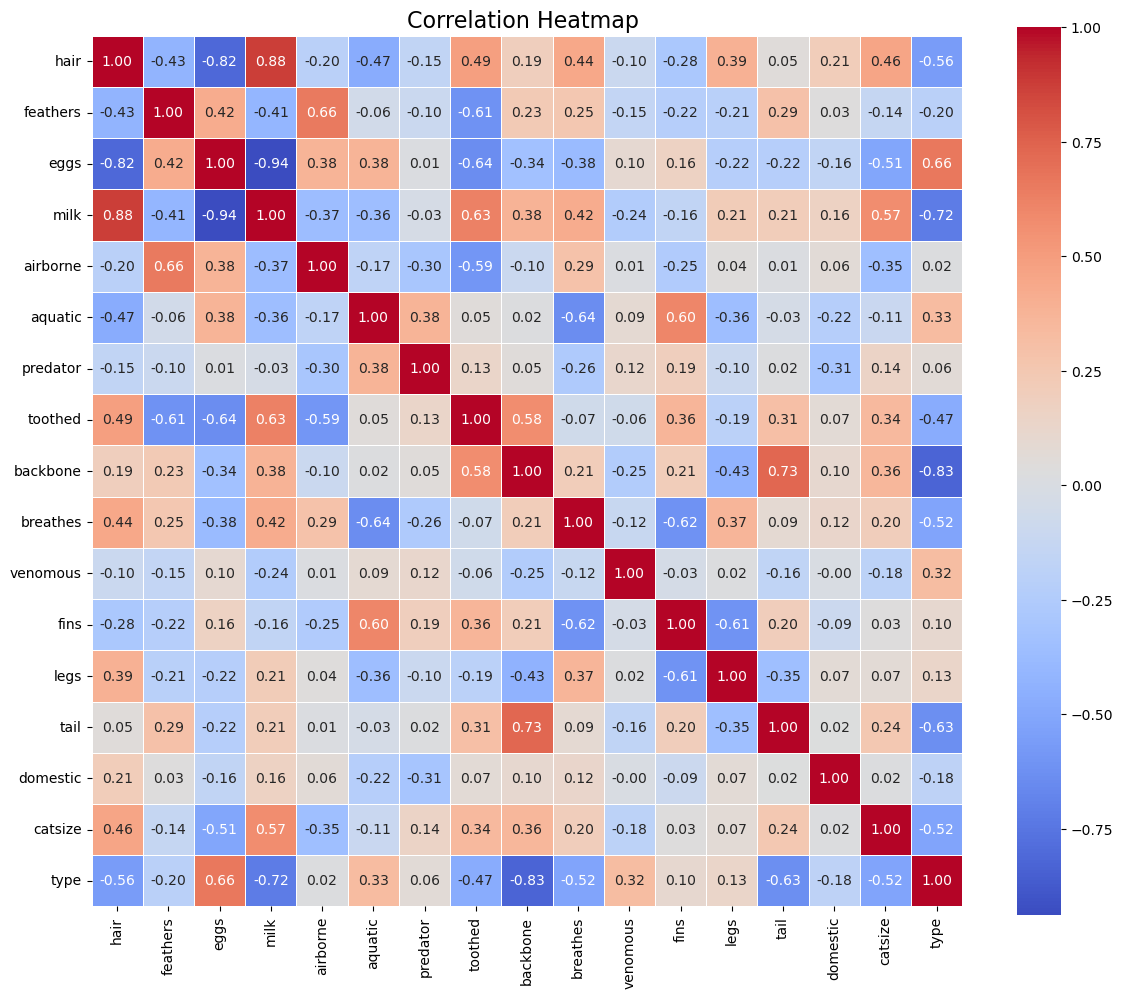

In [168]:
 #generating correlation heat maps to explore relationships between pairs of variables.
# Computing the correlation matrix
corr_matrix = df.corr()

# Setting  the matplotlib figure
plt.figure(figsize=(12, 10))

# plotting the heatmap with seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title("Correlation Heatmap ", fontsize=16)
plt.tight_layout()
plt.show()

In [169]:
# handling outliers
# IQR method to cap outliers 
for col in num_col:
    
    Q1 = df.loc[:,col].quantile(0.25)
    Q3 = df.loc[:,col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values above upper_bound
    df.loc[df.loc[:,col] > upper_bound, col] = upper_bound

    # Cap values below lower_bound
    df.loc[df.loc[:,col] < lower_bound, col] = lower_bound
    
    

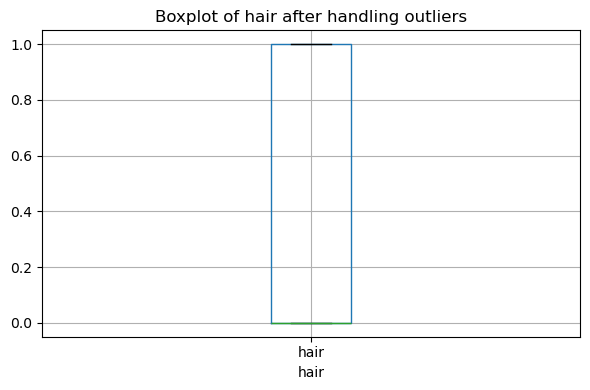

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


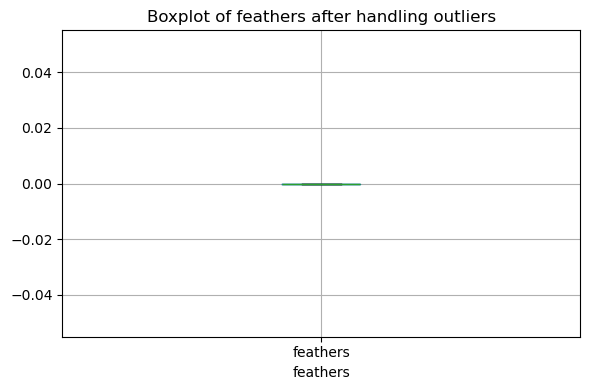

Outliers detected: 0
Lower extreme: 0.0
Upper extreme: 0.0


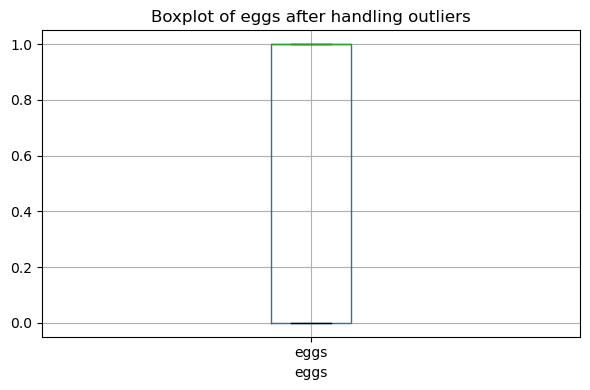

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


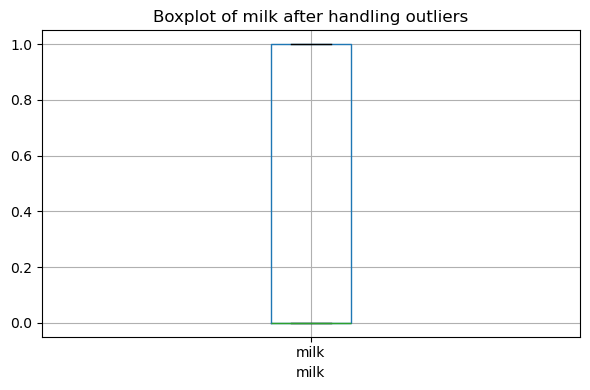

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


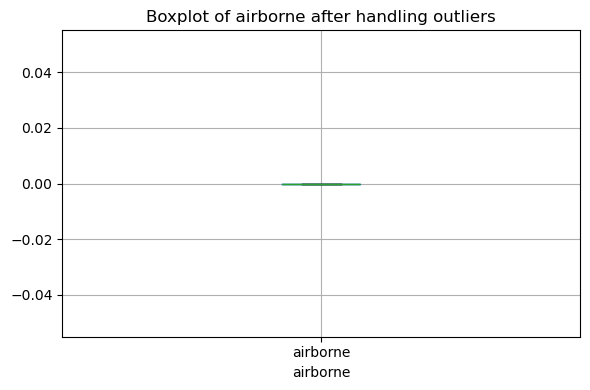

Outliers detected: 0
Lower extreme: 0.0
Upper extreme: 0.0


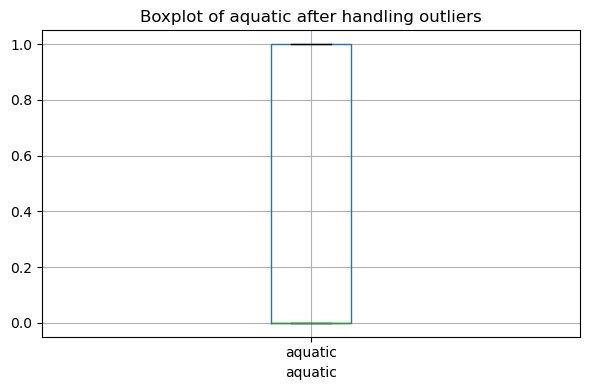

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


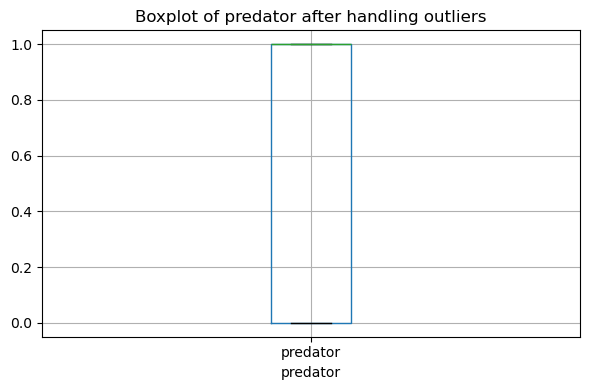

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


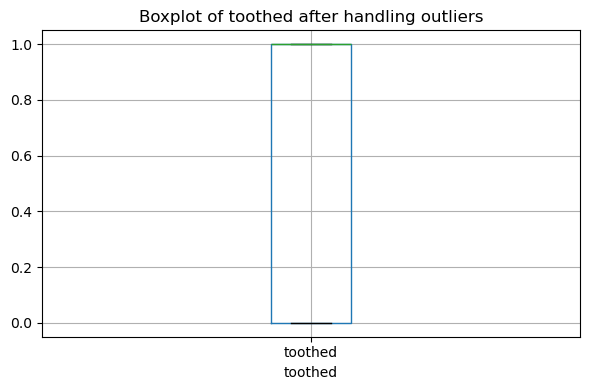

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


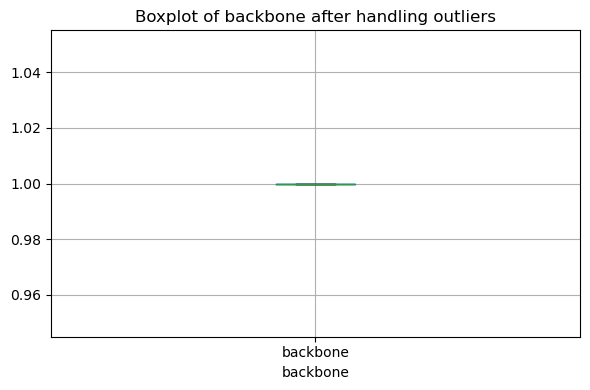

Outliers detected: 0
Lower extreme: 1.0
Upper extreme: 1.0


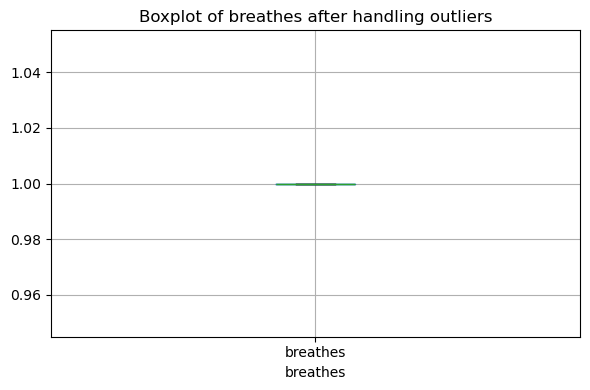

Outliers detected: 0
Lower extreme: 1.0
Upper extreme: 1.0


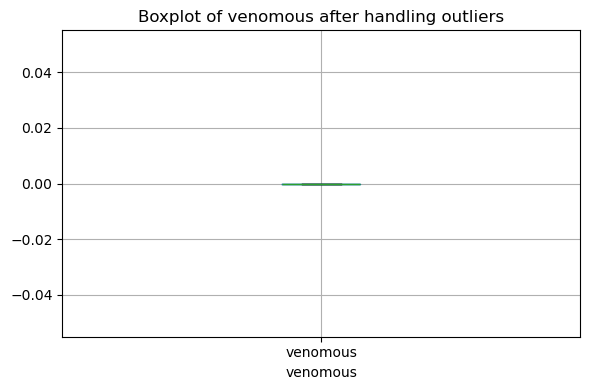

Outliers detected: 0
Lower extreme: 0.0
Upper extreme: 0.0


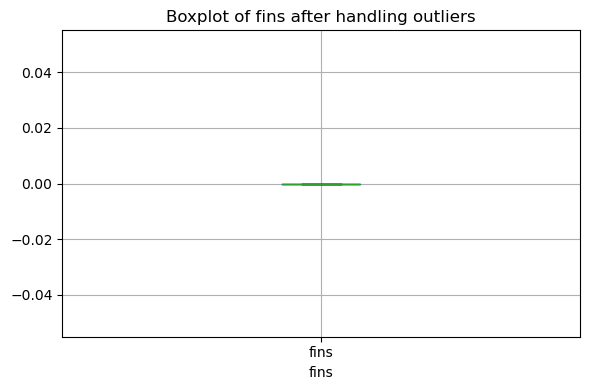

Outliers detected: 0
Lower extreme: 0.0
Upper extreme: 0.0


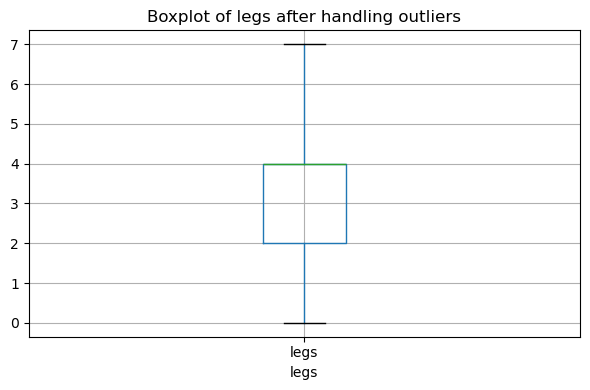

Outliers detected: 0
Lower extreme: -1.0
Upper extreme: 7.0


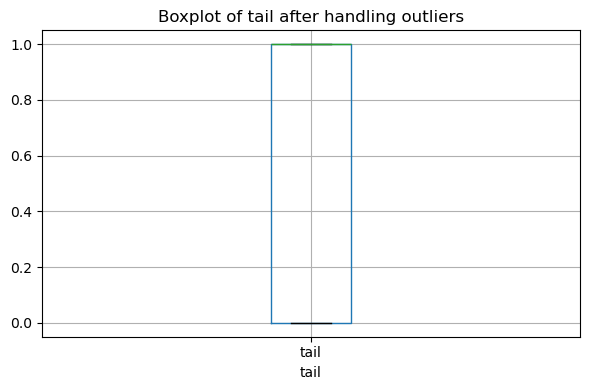

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


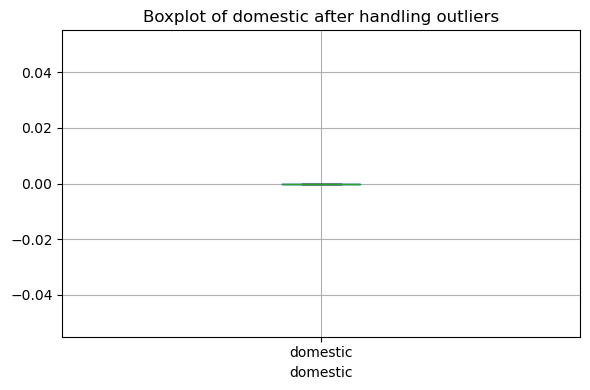

Outliers detected: 0
Lower extreme: 0.0
Upper extreme: 0.0


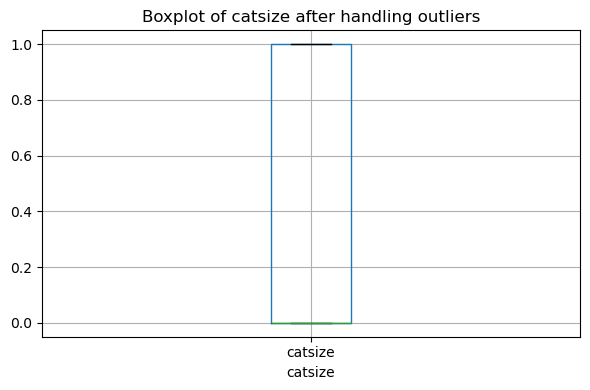

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


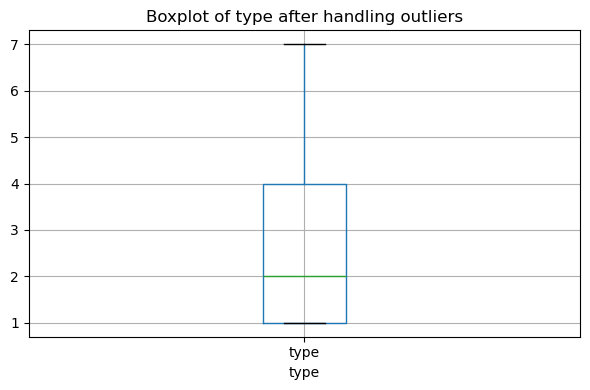

Outliers detected: 0
Lower extreme: -3.5
Upper extreme: 8.5


In [170]:
# boxplots after handling outliers
for col in num_col:
    series = df[col]
  # finding outliers by iqr
    Q1 = series.quantile(0.25) # determining q1
    Q3 = series.quantile(0.75)  # determining q3
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5 * IQR  #deterining lower extreme
    upper_extreme = Q3 + 1.5 * IQR   #deterining upper extreme
    outliers = series[(series < lower_extreme) | (series > upper_extreme)] # determining outliers

    plt.figure(figsize=(6, 4))
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col} after handling outliers")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    print(f"Outliers detected: {len(outliers)}") #printing no of outliers
    print(f"Lower extreme: {lower_extreme}")
    print(f"Upper extreme: {upper_extreme}")

In [171]:
# 3. Splitting the dataset into training and testing sets .
x=df.drop('type',axis=1)# dividing dependent and independent variables
y=df['type']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [172]:
x.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0,0.0,1.0,0,0.0,1.0,1.0,1,1,0,0,4,0.0,0,1.0
1,1.0,0,0.0,1.0,0,0.0,0.0,1.0,1,1,0,0,4,1.0,0,1.0
2,0.0,0,1.0,0.0,0,1.0,1.0,1.0,1,1,0,0,0,1.0,0,0.0
3,1.0,0,0.0,1.0,0,0.0,1.0,1.0,1,1,0,0,4,0.0,0,1.0
4,1.0,0,0.0,1.0,0,0.0,1.0,1.0,1,1,0,0,4,1.0,0,1.0


In [173]:
y.head()

0    1.0
1    1.0
2    4.0
3    1.0
4    1.0
Name: type, dtype: float64

In [174]:
# building the model
modelk=KNeighborsClassifier(n_neighbors=7,metric='euclidean')
modelk.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [175]:
# evaluating the model on test data
ypredk=modelk.predict(x_test)
print(classification_report(y_test,ypredk))

              precision    recall  f1-score   support

         1.0       0.92      1.00      0.96        12
         2.0       1.00      1.00      1.00        11
         3.0       0.00      0.00      0.00         1
         4.0       1.00      1.00      1.00         2
         5.0       0.00      0.00      0.00         2
         6.0       1.00      1.00      1.00         3
         7.0       0.00      0.00      0.00         0

    accuracy                           0.90        31
   macro avg       0.56      0.57      0.57        31
weighted avg       0.87      0.90      0.89        31



In [176]:
# 5. Choosing an appropriate distance metric and value for K by Hyperparameter Tuning:
from sklearn.model_selection import GridSearchCV
params={
    'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
    'metric':['euclidean','manhattan','minkowski']}
grid=GridSearchCV(modelk,params)
grid.fit(x_train,y_train)
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 1}

In [178]:
#deploying the final model with best params provided by gridsearch
fmodelk=KNeighborsClassifier(n_neighbors=1,metric='manhattan')
fmodelk.fit(x_train,y_train)
# evaluating the model on test data
fypredk=fmodelk.predict(x_test)
print(classification_report(y_test,fypredk))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        12
         2.0       1.00      1.00      1.00        11
         3.0       0.00      0.00      0.00         1
         4.0       1.00      1.00      1.00         2
         5.0       0.67      1.00      0.80         2
         6.0       1.00      1.00      1.00         3

    accuracy                           0.97        31
   macro avg       0.78      0.83      0.80        31
weighted avg       0.95      0.97      0.95        31



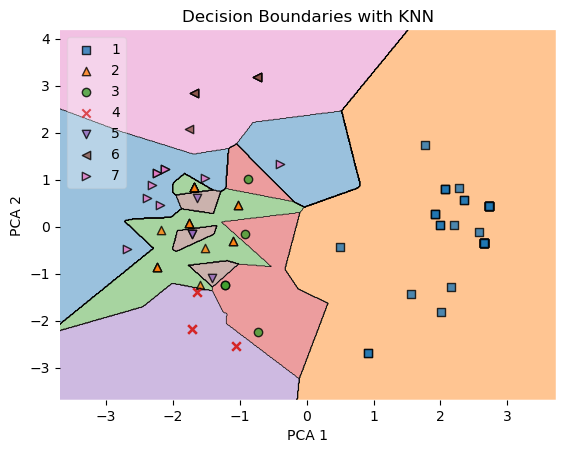

In [179]:
# Visualizing the decision boundaries of the classifier.
# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Reducing to 2D for plotting (pca)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Training with KNN
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_pca, y)
from mlxtend.plotting import plot_decision_regions


# plotting
plot_decision_regions(X_pca, y.to_numpy().astype(int), clf=model, legend=2)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Decision Boundaries with KNN")
plt.show()


In [180]:
 # inteview questions
# 1. What are the key hyperparameters in KNN?
# Key Hyperparameters in KNN:
#n_neighbors-Number of neighbors to consider (the K in KNN),Higher values give smoother boundaries but may underfit, lower values may overfit.
# the distance metric used to measure similarity such as 'minkowski','euclidean','manhattan'.
# the weighting scheme used to aggregate the labels of the nearest neighbors.

#2. What distance metrics can be used in KNN?
# Euclidean distance ,Manhattan distance ,Minkowski distance ,Cosine similarity